In [3]:
import numpy as np
import jax.numpy as jnp
import sympy as sp
import matplotlib.pyplot as plt
import jax

from pde_opt.numerics.equations.cahn_hilliard import CahnHilliard2DPeriodic
from pde_opt.numerics.symbolic.cahn_hilliard_sym import SymbolicCahnHilliard2DPeriodic
from pde_opt.numerics.utils.testing import test_convergence, plot_convergence

In [4]:
jax.config.update("jax_enable_x64", True)

In [ ]:
x, y, t = sp.symbols('x y t', real=True)
u_star = sp.sin(2*x) * sp.cos(3*y) * sp.exp(-0.7*t)

mu_sym = lambda u: u**3 - u    # common CH choice (W'(u))
# D_sym  = lambda u: 1           # constant mobility
D_sym  = lambda u: 1 + u**2    # variable mobility


Ns   = [32, 64, 128, 256, 512]

In [13]:
numeric_args = {"kappa": 1e-2, "mu": mu_sym, "D": D_sym, "derivs": "fd"}
symbolic_args = {"kappa": 1e-2, "mu_sym": mu_sym, "D_sym": D_sym, "u_star": u_star}

In [14]:
dx, errors = test_convergence(CahnHilliard2DPeriodic, SymbolicCahnHilliard2DPeriodic, numeric_args, symbolic_args, Ns, 2*np.pi)

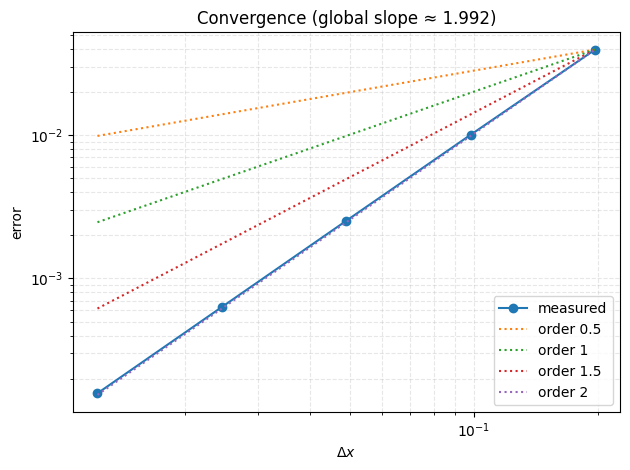

In [15]:
plot_convergence(dx, errors, orders=(0.5, 1.0, 1.5, 2.0), anchor='max')